# Filtros en Visión Artificial
## Aplicando Filtros a  imágenes

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
###%matplotlib notebook

### Función para facilitar visualización de la imagen.

In [15]:
def show_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]
    #plt.figure(figsize=(30,30))
    ax = plt.subplot(3, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')
    if(pos == 9):
        plt.savefig('out/Parte_4.png', dpi=600, bbox_inches='tight')
        

## Aplicación de Filtros Arbitrarios

kernel: [[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


Text(0.5, 1.0, '10x10')

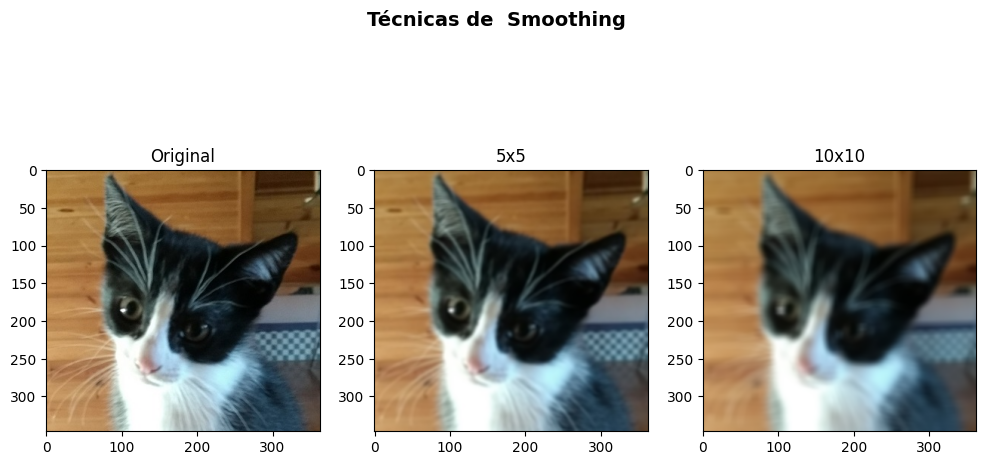

In [16]:
image = cv2.imread('cat-face.png')

# crear in objeto figura con las dimensiones adecuadas
plt.figure(figsize=(12, 6))
plt.suptitle("Técnicas de  Smoothing", fontsize=14, fontweight='bold')

# Creamos el kernel para el suavizado de la imagen
# En este caso se crea un kernel (10,10)  
kernel_averaging_10_10 = np.ones((10, 10), np.float32) / 100

# kernel_averaging_5_5 = np.ones((5, 5), np.float32)/25
kernel_averaging_5_5 = np.array([[0.04, 0.04, 0.04, 0.04, 0.04],
                                 [0.04, 0.04, 0.04, 0.04, 0.04],
                                 [0.04, 0.04, 0.04, 0.04, 0.04],
                                 [0.04, 0.04, 0.04, 0.04, 0.04],
                                 [0.04, 0.04, 0.04, 0.04, 0.04]])

print("kernel: {}".format(kernel_averaging_5_5))

# La funcioón cv2.filter2D() aplica el filtro lineal arbitrario
smooth_image_f2D_5_5 = cv2.filter2D(image, -1, kernel_averaging_5_5)
smooth_image_f2D_10_10 = cv2.filter2D(image, -1, kernel_averaging_10_10)



plt.subplot(131)
# Mostrar la imagen con matplotlib:
plt.imshow(image[:, :, ::-1])
plt.title("Original")
plt.subplot(132)
# Mostrar la imagen con matplotlib:
plt.imshow(smooth_image_f2D_5_5[:, :, ::-1])
plt.title("5x5")
plt.subplot(133)
# Mostrar la imagen con matplotlib:
plt.imshow(smooth_image_f2D_10_10[:, :, ::-1])
plt.title("10x10")

## Aplicación de Filtros de OpenCV

In [17]:
# La funcion cv2.blur() suaviza una imagen utilizando un box fitler.
smooth_image_b = cv2.blur(image, (10, 10))

In [18]:
# Cuando el parámtero normalize de la función  de la  boxFilter se declara en true,
# cv2.filter2D() y cv2.boxFilter() ejecutan la misma operación
smooth_image_bfi = cv2.boxFilter(image, -1, (10, 10), normalize=True) 


In [19]:
# La función cv2.GaussianBlur()aplica una convolución en la imagen de fuente 
# Este kernel se puede controlar usando los paramétros (kernel size), 
# la desviación estandar y la dirección del kernel gaussiano

smooth_image_gb = cv2.GaussianBlur(image, (9, 9), 0)

In [20]:
# Esta función cv2.medianBlur(),difumina la imagen con el kernel
#cv2.medianBlur(src, ksize[, dst]) 
# ksize – aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7 

smooth_image_mb = cv2.medianBlur(image, 9)

In [21]:
# Esta función cv2.bilateralFilter() puede ser aplicada a la entrada 
# Reducción de ruido 
#https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed
smooth_image_bf = cv2.bilateralFilter(image, 5, 10, 10)
smooth_image_bf_2 = cv2.bilateralFilter(image, 9, 200, 200)

## Graficando los Resultados

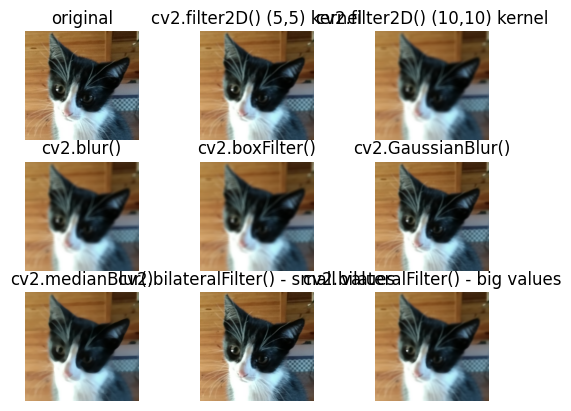

In [22]:
%matplotlib inline
# Graficar las  images:
show_with_matplotlib(image, "original", 1)
show_with_matplotlib(smooth_image_f2D_5_5, "cv2.filter2D() (5,5) kernel", 2)
show_with_matplotlib(smooth_image_f2D_10_10, "cv2.filter2D() (10,10) kernel", 3)
show_with_matplotlib(smooth_image_b, "cv2.blur()", 4)
show_with_matplotlib(smooth_image_bfi, "cv2.boxFilter()", 5)
show_with_matplotlib(smooth_image_gb, "cv2.GaussianBlur()", 6)
show_with_matplotlib(smooth_image_mb, "cv2.medianBlur()", 7)
show_with_matplotlib(smooth_image_bf, "cv2.bilateralFilter() - small values", 8)
show_with_matplotlib(smooth_image_bf_2, "cv2.bilateralFilter() - big values", 9)

# Mostrar los resultados de la apliación en lugar de un alto mando
plt.show()
